In [ ]:
#Available in docs
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
 
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'          # https://pro-api.coinmarketcap.com  (get this in Authenction part) 
parameters = {
  'start':'1',
  'limit':'15',             # for ease you can set limit of data you want as (default set is 5000) 
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'abcdd7dd1d194f699a3d87d855c40015',  # insert your APi Key
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


# error may occur so Increase the data rate limit    (jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10)

In [3]:
type(data)


dict

In [4]:
#normalize json and max the column
import pandas as pd 

pd.set_option('display.max_columns' ,None)
pd.set_option('display.max_rows' ,None)

In [5]:
df = pd.json_normalize(data['data'])     # var[data]
df['timestamp'] = pd.to_datetime('now')   # creating and adding timestamp column 

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12469,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.994559e+07,1.994559e+07,False,NaN,1,NaN,NaN,None,2025-11-07T13:56:00.000Z,100387.727866,8.197966e+10,41.3538,1.032830,-2.890360,-8.859550,-17.965820,-10.352320,-14.209884,2.002292e+12,59.8596,2.108142e+12,None,2025-11-07T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-07 19:43:20.313187
1,1027,Ethereum,ETH,ethereum,11114,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206968e+08,1.206968e+08,True,NaN,2,NaN,NaN,None,2025-11-07T13:56:00.000Z,3243.478061,3.995237e+10,10.5917,1.027112,-4.424092,-15.924606,-27.437698,-25.003079,-22.204285,3.914775e+11,11.7034,3.914775e+11,None,2025-11-07T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-07 19:43:20.313187
2,825,Tether USDt,USDT,tether,157247,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.834480e+11,1.859512e+11,True,NaN,3,NaN,NaN,None,2025-11-07T13:56:00.000Z,0.999748,1.525503e+11,16.0171,0.058851,0.018917,0.000912,-0.069264,-0.013290,-0.034219,1.834017e+11,5.4829,1.859043e+11,None,2025-11-07T13:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-07 19:43:20.313187
3,52,XRP,XRP,xrp,1754,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.010720e+10,9.998577e+10,False,NaN,4,NaN,NaN,None,2025-11-07T13:56:00.000Z,2.189049,5.319202e+09,-10.0766,1.420855,-4.999241,-12.703437,-23.682964,-26.576831,-33.335322,1.315776e+11,3.9336,2.189049e+11,None,2025-11-07T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-07 19:43:20.313187
4,1839,BNB,BNB,bnb,2937,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377375e+08,1.377375e+08,1.377375e+08,False,NaN,5,NaN,NaN,None,2025-11-07T13:56:00.000Z,937.337027,3.130012e+09,11.7271,0.721647,-1.151459,-13.372884,-28.170554,6.489097,15.973951,1.291064e+11,3.8597,1.291064e+11,None,2025-11-07T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-07 19:43:20.313187
5,5426,Solana,SOL,solana,1046,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.534697e+08,6.135448e+08,True,NaN,6,5.252369e+08,8.020752e+10,None,2025-11-07T13:56:00.000Z,152.707320,5.742704e+09,1.4240,0.968714,-4.970816,-18.727647,-30.684220,-28.486019,-15.187934,8.451887e+10,2.5267,9.369278e+10,None,2025-11-07T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-07 19:43:20.313187
6,3408,USDC,USDC,usd-coin,34214,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.548573e+10,7.548573e+10,False,NaN,7,6.090122e+10,6.089593e+10,None,2025-11-07T13:56:00.000Z,0.999913,1.950587e+10,15.8614,0.028398,0.034188,-0.016883,-0.014642,0.010878,-0.001990,7.547917e+10,2.2565,7.547917e+10,None,2025-11-07T13:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-07 19:43:20.313187
7,1958,TRON,TRX,tron,1259,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.466628e+10,9.466628e+10,True,NaN,8,9.466789e+10,2.694162e+10,None,2025-11-07T13:56:00.000Z,0.284591,7.657524e+08,33.1337,0.309684,-0.858780,-3.760453,-15.621770,-14.525852,-15.400231,2.694116e+10,0.8054,2.694116e+10,None,2025-11-07T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-07 19:43:20.313187
8,74,Dogecoin,DOGE,dogecoin,1345,2013-12-15T

In [ ]:
# create automation  ( orginal we setup above and now append new (df2) here for automation )

def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'          # https://pro-api.coinmarketcap.com  (get this in Authenction part) 
    parameters = {
      'start':'1',
      'limit':'15',             # for ease you can set limit of data you want as (default set is 5000) 
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'abcdd7dd1d194f699a3d87d855c40015',  # insert your APi Key
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    global df;

    #normalize and add timestamp 

    #  df2 = pd.json_normalize(data['data'])     # var[data]
    # df2['timestamp'] = pd.to_datetime('now')   # creating and adding timestamp column 
    # df = pd.concat([df, df2], ignore_index=True)    # appending df2 in df


    df = pd.json_normalize(data['data'])     # var[data]
    df['timestamp'] = pd.to_datetime('now')   # creating and adding timestamp column 
    df     # appending df2 in df

    if not os.path.isfile(r'C:\Python\Projects\automated files csv\Api.csv'):
        df.to_csv(r'C:\Python\Projects\automated files csv\Api.csv', header = 'column_names' )       # create csv and create header based on column name
    else:
        df.to_csv(r'C:\Python\Projects\automated files csv\Api.csv',mode = 'a',header =False  )
        


In [ ]:
import os
from time import time
from time import sleep

 # this 333 is the time limit to use API per day so its max  (10000 per month)
for i in range(333):
    api_runner()
    print('Api runner completed successfully')    #joins the two DataFrames vertically (same as append).
    sleep(60)  # sleep for 1 minutes
exit()

In [ ]:
df_read = pd.read_csv(r"C:\Python\Projects\automated files csv\Api.csv")

df_read

****Cleaning****


In [11]:
pd.set_option('display.float_format' , lambda x : '%.5f' %x)

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12469,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19945587.00000,19945587.00000,False,NaN,1,NaN,NaN,None,2025-11-07T13:56:00.000Z,100387.72787,81979656072.11598,41.35380,1.03283,-2.89036,-8.85955,-17.96582,-10.35232,-14.20988,2002292159892.47900,59.85960,2108142285195.32007,None,2025-11-07T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-07 19:43:20.853131
1,1027,Ethereum,ETH,ethereum,11114,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120696816.69405,120696816.69405,True,NaN,2,NaN,NaN,None,2025-11-07T13:56:00.000Z,3243.47806,39952369640.52437,10.59170,1.02711,-4.42409,-15.92461,-27.43770,-25.00308,-22.20428,391477476934.61334,11.70340,391477476934.60999,None,2025-11-07T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-07 19:43:20.853131
2,825,Tether USDt,USDT,tether,157247,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,183447967195.50757,185951181465.57034,True,NaN,3,NaN,NaN,None,2025-11-07T13:56:00.000Z,0.99975,152550253327.09396,16.01710,0.05885,0.01892,0.00091,-0.06926,-0.01329,-0.03422,183401686768.43112,5.48290,185904269525.22000,None,2025-11-07T13:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-07 19:43:20.853131
3,52,XRP,XRP,xrp,1754,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60107199237.00000,99985774127.00000,False,NaN,4,NaN,NaN,None,2025-11-07T13:56:00.000Z,2.18905,5319201628.20133,-10.07660,1.42085,-4.99924,-12.70344,-23.68296,-26.57683,-33.33532,131577630796.54996,3.93360,218904943944.81000,None,2025-11-07T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-07 19:43:20.853131
4,1839,BNB,BNB,bnb,2937,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137737453.92000,137737453.92000,137737453.92000,False,NaN,5,NaN,NaN,None,2025-11-07T13:56:00.000Z,937.33703,3130011787.74564,11.72710,0.72165,-1.15146,-13.37288,-28.17055,6.48910,15.97395,129106415613.38853,3.85970,129106415613.39000,None,2025-11-07T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-07 19:43:20.853131
5,5426,Solana,SOL,solana,1046,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,553469680.20686,613544784.84095,True,NaN,6,525236893.30000,80207518200.82790,None,2025-11-07T13:56:00.000Z,152.70732,5742704022.09542,1.42400,0.96871,-4.97082,-18.72765,-30.68422,-28.48602,-15.18793,84518871417.97311,2.52670,93692779629.34000,None,2025-11-07T13:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-07 19:43:20.853131
6,3408,USDC,USDC,usd-coin,34214,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,75485727695.70184,75485727695.70184,False,NaN,7,60901219650.23000,60895926472.54466,None,2025-11-07T13:56:00.000Z,0.99991,19505874520.72964,15.86140,0.02840,0.03419,-0.01688,-0.01464,0.01088,-0.00199,75479166917.90962,2.25650,75479166917.91000,None,2025-11-07T13:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-07 19:43:20.853131
7,1958,TRON,TRX,tron,1259,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94666279029.18550,94666279245.83211,True,NaN,8,94667886298.42999,26941618151.16680,None,2025-11-07T13:56:00.000Z,0.28459,765752361.45346,33.13370,0.30968,-0.85878,-3.76

In [13]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h' , 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d' ,'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.03283,-2.89036,-8.85955,-17.96582,-10.35232,-14.20988
Ethereum,1.02711,-4.42409,-15.92461,-27.43770,-25.00308,-22.20428
Tether USDt,0.05885,0.01892,0.00091,-0.06926,-0.01329,-0.03422
XRP,1.42085,-4.99924,-12.70344,-23.68296,-26.57683,-33.33532
BNB,0.72165,-1.15146,-13.37288,-28.17055,6.48910,15.97395
Solana,0.96871,-4.97082,-18.72765,-30.68422,-28.48602,-15.18793
USDC,0.02840,0.03419,-0.01688,-0.01464,0.01088,-0.00199
TRON,0.30968,-0.85878,-3.76045,-15.62177,-14.52585,-15.40023
Dogecoin,1.07369,-0.61501,-12.83258,-35.43830,-31.46083,-31.82434


In [14]:
df4 = df3.stack()

df4

name                                      
Bitcoin       quote.USD.percent_change_1h       1.03283
              quote.USD.percent_change_24h     -2.89036
              quote.USD.percent_change_7d      -8.85955
              quote.USD.percent_change_30d    -17.96582
              quote.USD.percent_change_60d    -10.35232
              quote.USD.percent_change_90d    -14.20988
Ethereum      quote.USD.percent_change_1h       1.02711
              quote.USD.percent_change_24h     -4.42409
              quote.USD.percent_change_7d     -15.92461
              quote.USD.percent_change_30d    -27.43770
              quote.USD.percent_change_60d    -25.00308
              quote.USD.percent_change_90d    -22.20428
Tether USDt   quote.USD.percent_change_1h       0.05885
              quote.USD.percent_change_24h      0.01892
              quote.USD.percent_change_7d       0.00091
              quote.USD.percent_change_30d     -0.06926
              quote.USD.percent_change_60d     -0.01329
     

In [15]:
type(df4)

pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                                
Bitcoin      quote.USD.percent_change_1h     1.03283
             quote.USD.percent_change_24h   -2.89036
             quote.USD.percent_change_7d    -8.85955
             quote.USD.percent_change_30d  -17.96582
             quote.USD.percent_change_60d  -10.35232
             quote.USD.percent_change_90d  -14.20988
Ethereum     quote.USD.percent_change_1h     1.02711
             quote.USD.percent_change_24h   -4.42409
             quote.USD.percent_change_7d   -15.92461
             quote.USD.percent_change_30d  -27.43770
             quote.USD.percent_change_60d  -25.00308
             quote.USD.percent_change_90d  -22.20428
Tether USDt  quote.USD.percent_change_1h     0.05885
             quote.USD.percent_change_24h    0.01892
             quote.USD.percent_change_7d     0.00091
             quote.USD.percent_change_30d   -0.06926
             quote.USD.percent_change_60d   -0.01329
             quote.USD.percent_change_90d   -0.03422
XRP          quote.USD.percent_change_1h     1.42085
             quote.USD.percent_change_24h   -4.99924
             quote.USD.percent_change_7d   -12.70344
             quote.USD.percent_change_30d  -23.68296
             quote.USD.percent_change_60d  -26.57683
             quote.USD.percent_change_90d  -33.33532
BNB          quote.USD.percent_change_1h     0.72165
             quote.USD.percent_change_24h   -1.15146
             quote.USD.percent_change_7d   -13.37288
             quote.USD.percent_change_30d  -28.17055
             quote.USD.percent_change_60d    6.48910
             quote.USD.percent_change_90d   15.97395
Solana       quote.USD.percent_change_1h     0.96871
             quote.USD.percent_change_24h   -4.97082
             quote.USD.percent_change_7d   -18.72765
             quote.USD.percent_change_30d  -30.68422
             quote.USD.percent_change_60d  -28.48602
             quote.USD.percent_change_90d  -15.18793
USDC         quote.USD.percent_change_1h     0.02840
             quote.USD.percent_change_24h    0.03419
             quote.USD.percent_change_7d    -0.01688
             quote.USD.percent_change_30d   -0.01464
             quote.USD.percent_change_60d    0.01088
             quote.USD.percent_change_90d   -0.00199
TRON         quote.USD.percent_change_1h     0.30968
             quote.USD.percent_change_24h   -0.85878
             quote.USD.percent_change_7d    -3.76045
             quote.USD.percent_change_30d  -15.62177
             quote.USD.percent_change_60d  -14.52585
             quote.USD.percent_change_90d  -15.40023
Dogecoin     quote.USD.percent_change_1h     1.07369
             quote.USD.percent_change_24h   -0.61501
             quote.USD.percent_change_7d   -12.83258
             quote.USD.percent_change_30d  -35.43830
             quote.USD.percent_change_60d  -31.46083
             quote.USD.percent_change_90d  -31.82434
Cardano      quote.USD.percent_change_1h     1.37017
             quote.USD.percent_change_24h   -1.82257
             quote.USD.percent_change_7d   -14.01716
             quote.USD.percent_change_30d  -35.52361
             quote.USD.percent_change_60d  -38.41344
             quote.USD.percent_change_90d  -34.42854
Hyperliquid  quote.USD.percent_change_1h     3.25640
             quote.USD.percent_change_24h   -2.15970
             quote.USD.percent_change_7d   -10.51004
             quote.USD.percent_change_30d  -14.20251
             quote.USD.percent_change_60d  -22.86717
             quote.USD.percent_change_90d   -9.56723
Zcash        quote.USD.percent_change_1h    -0.23528
             quote.USD.percent_change_24h   16.64248
             quote.USD.percent_change_7d    71.68387
             quote.USD.percent_change_30d  341.30840
             quote.USD.percent_change_60d 1182.08126
             quote.USD.percent_change_90d 1490.49054
Chainlink    quote.USD.percent_change_1h     1.71518
             quote.USD.percent_change_24h   -2.95632
             quote

In [17]:
type(df5)

pandas.core.frame.DataFrame

In [19]:
df5.count()

values    90
dtype: int64

In [25]:
index = pd.Index(range(90))

df6 = df5.set_index(index)
df6

,values
0,1.03283
1,-2.89036
2,-8.85955
3,-17.96582
4,-10.35232
5,-14.20988
6,1.02711
7,-4.42409
8,-15.92461
9,-27.43770


In [26]:
# now reset 

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.03283
1,Bitcoin,quote.USD.percent_change_24h,-2.89036
2,Bitcoin,quote.USD.percent_change_7d,-8.85955
3,Bitcoin,quote.USD.percent_change_30d,-17.96582
4,Bitcoin,quote.USD.percent_change_60d,-10.35232
5,Bitcoin,quote.USD.percent_change_90d,-14.20988
6,Ethereum,quote.USD.percent_change_1h,1.02711
7,Ethereum,quote.USD.percent_change_24h,-4.42409
8,Ethereum,quote.USD.percent_change_7d,-15.92461
9,Ethereum,quote.USD.percent_change_30d,-27.43770


In [27]:
df7 = df6.rename(columns = {'level_1' : 'percentage_change'})
df7

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.03283
1,Bitcoin,quote.USD.percent_change_24h,-2.89036
2,Bitcoin,quote.USD.percent_change_7d,-8.85955
3,Bitcoin,quote.USD.percent_change_30d,-17.96582
4,Bitcoin,quote.USD.percent_change_60d,-10.35232
5,Bitcoin,quote.USD.percent_change_90d,-14.20988
6,Ethereum,quote.USD.percent_change_1h,1.02711
7,Ethereum,quote.USD.percent_change_24h,-4.42409
8,Ethereum,quote.USD.percent_change_7d,-15.92461
9,Ethereum,quote.USD.percent_change_30d,-27.43770


****Visulize****

In [35]:
df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

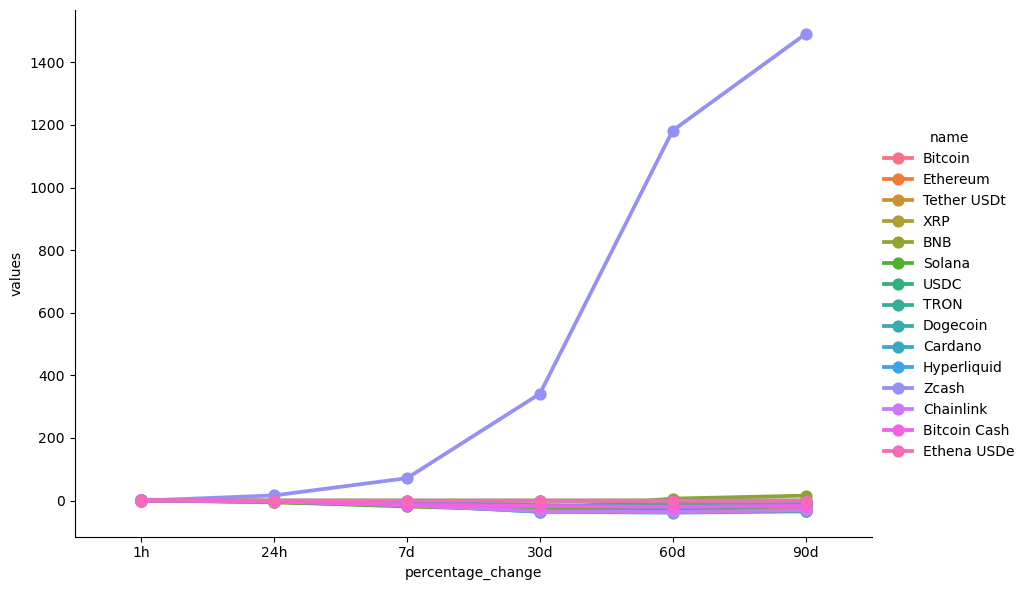

In [40]:
sns.catplot(
    x='percentage_change',
    y='values',
    hue='name',
    data=df7,
    kind='point',
    height=6,   # height of each facet (in inches)
    aspect=1.5  # width = height * aspect
)

In [41]:
df10 = df[['name','quote.USD.price','timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,100387.72787,2025-11-07 19:43:20.853131
1,Ethereum,3243.47806,2025-11-07 19:43:20.853131
2,Tether USDt,0.99975,2025-11-07 19:43:20.853131
3,XRP,2.18905,2025-11-07 19:43:20.853131
4,BNB,937.33703,2025-11-07 19:43:20.853131
5,Solana,152.70732,2025-11-07 19:43:20.853131
6,USDC,0.99991,2025-11-07 19:43:20.853131
7,TRON,0.28459,2025-11-07 19:43:20.853131
8,Dogecoin,0.16231,2025-11-07 19:43:20.853131
9,Cardano,0.52804,2025-11-07 19:43:20.853131


In [44]:
df10.query(" name == 'Bitcoin' ")


,name,quote.USD.price,timestamp
0,Bitcoin,100387.72787,2025-11-07 19:43:20.853131
